# Using Selenium to Control the Browser
Use ```selenium``` in combination with a browser driver to control a browser. This combination of driver and Selenium is one method to test web browsers and also helpful when it is difficult or impossible to scrape data using only Beautiful soup and requests.

> Note: If using Linux, avoid using the Flatpak installation of Chrome. Use the .deb instead.

## Get Selenium-Controlled Instance of Chrome Browser
Below is an example of how you would programmatically send login information to MyBama.

First, find copy the url and then import web driver, start an instance of Chrome and then pass the URL using the ```get``` method.

In [51]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import bs4

In [52]:
# path = '/usr/bin/chromedriver'
path = './chromedriver' # In current folder
# path = '/usr/local/bin/chromedriver'
# path = r'c:\chromedriver\chromedriver.exe' # Windows
service = Service(executable_path=path)
browser = webdriver.Chrome(service=service)

In [53]:
browser.delete_all_cookies()

In [54]:
browser.get('https://finance.yahoo.com/quote/AAPL')

## Locate the target elements
To log into MyBama you'll need to enter an ID and password. Use the Inspect Element of your browser to locate the specific element that provides the input box for ID and password. 

For example, drill down the hierarchy until only the myBama ID box is highlighted when you are mousing over its corresponding element.
```HTML
<input class="required" id="username" size="25" tabindex="1" type="text" accesskey="u" autocomplete="off" 
       autocorrect="off" autocapitalize="off" spellcheck="false" name="username" value="">
```
Notice the tag name (input) and the id (username). We can use these to uniquely locate the form box and place a value inside of it.

However, before we locate that exact tag, let's look at some methods to find elements.

# Finding Elements on the Page
WebDriver objects provide two primary methods for locating elements.
1. find_element (singular)
2. find_elements (plural)

Using the singular option returns the *first* element on the page. Using the plural option returns a list of WebElement_* objects.

For example, using the myBama login page, we can locate the following.

There are many different methods by which you can find elements on a page.
* by tag
* by ID
* by class name
* using CSS selectors
* using XPath notation


## Use named parameters

In [55]:
# Click the 3 month view
browser.find_element(by='id',value='tab-3m').click()

## Use the By object with ID attribute

In [56]:
# Click the Year-To-Date view
browser.find_element(By.ID,'tab-YTD').click()

In [59]:
# Change to the Advanced Chart view
browser.find_element(By.CLASS_NAME,'advchartlabel').click()

## Take a screenshot and display it

In [60]:
adv_chart_png = browser.get_screenshot_as_png()

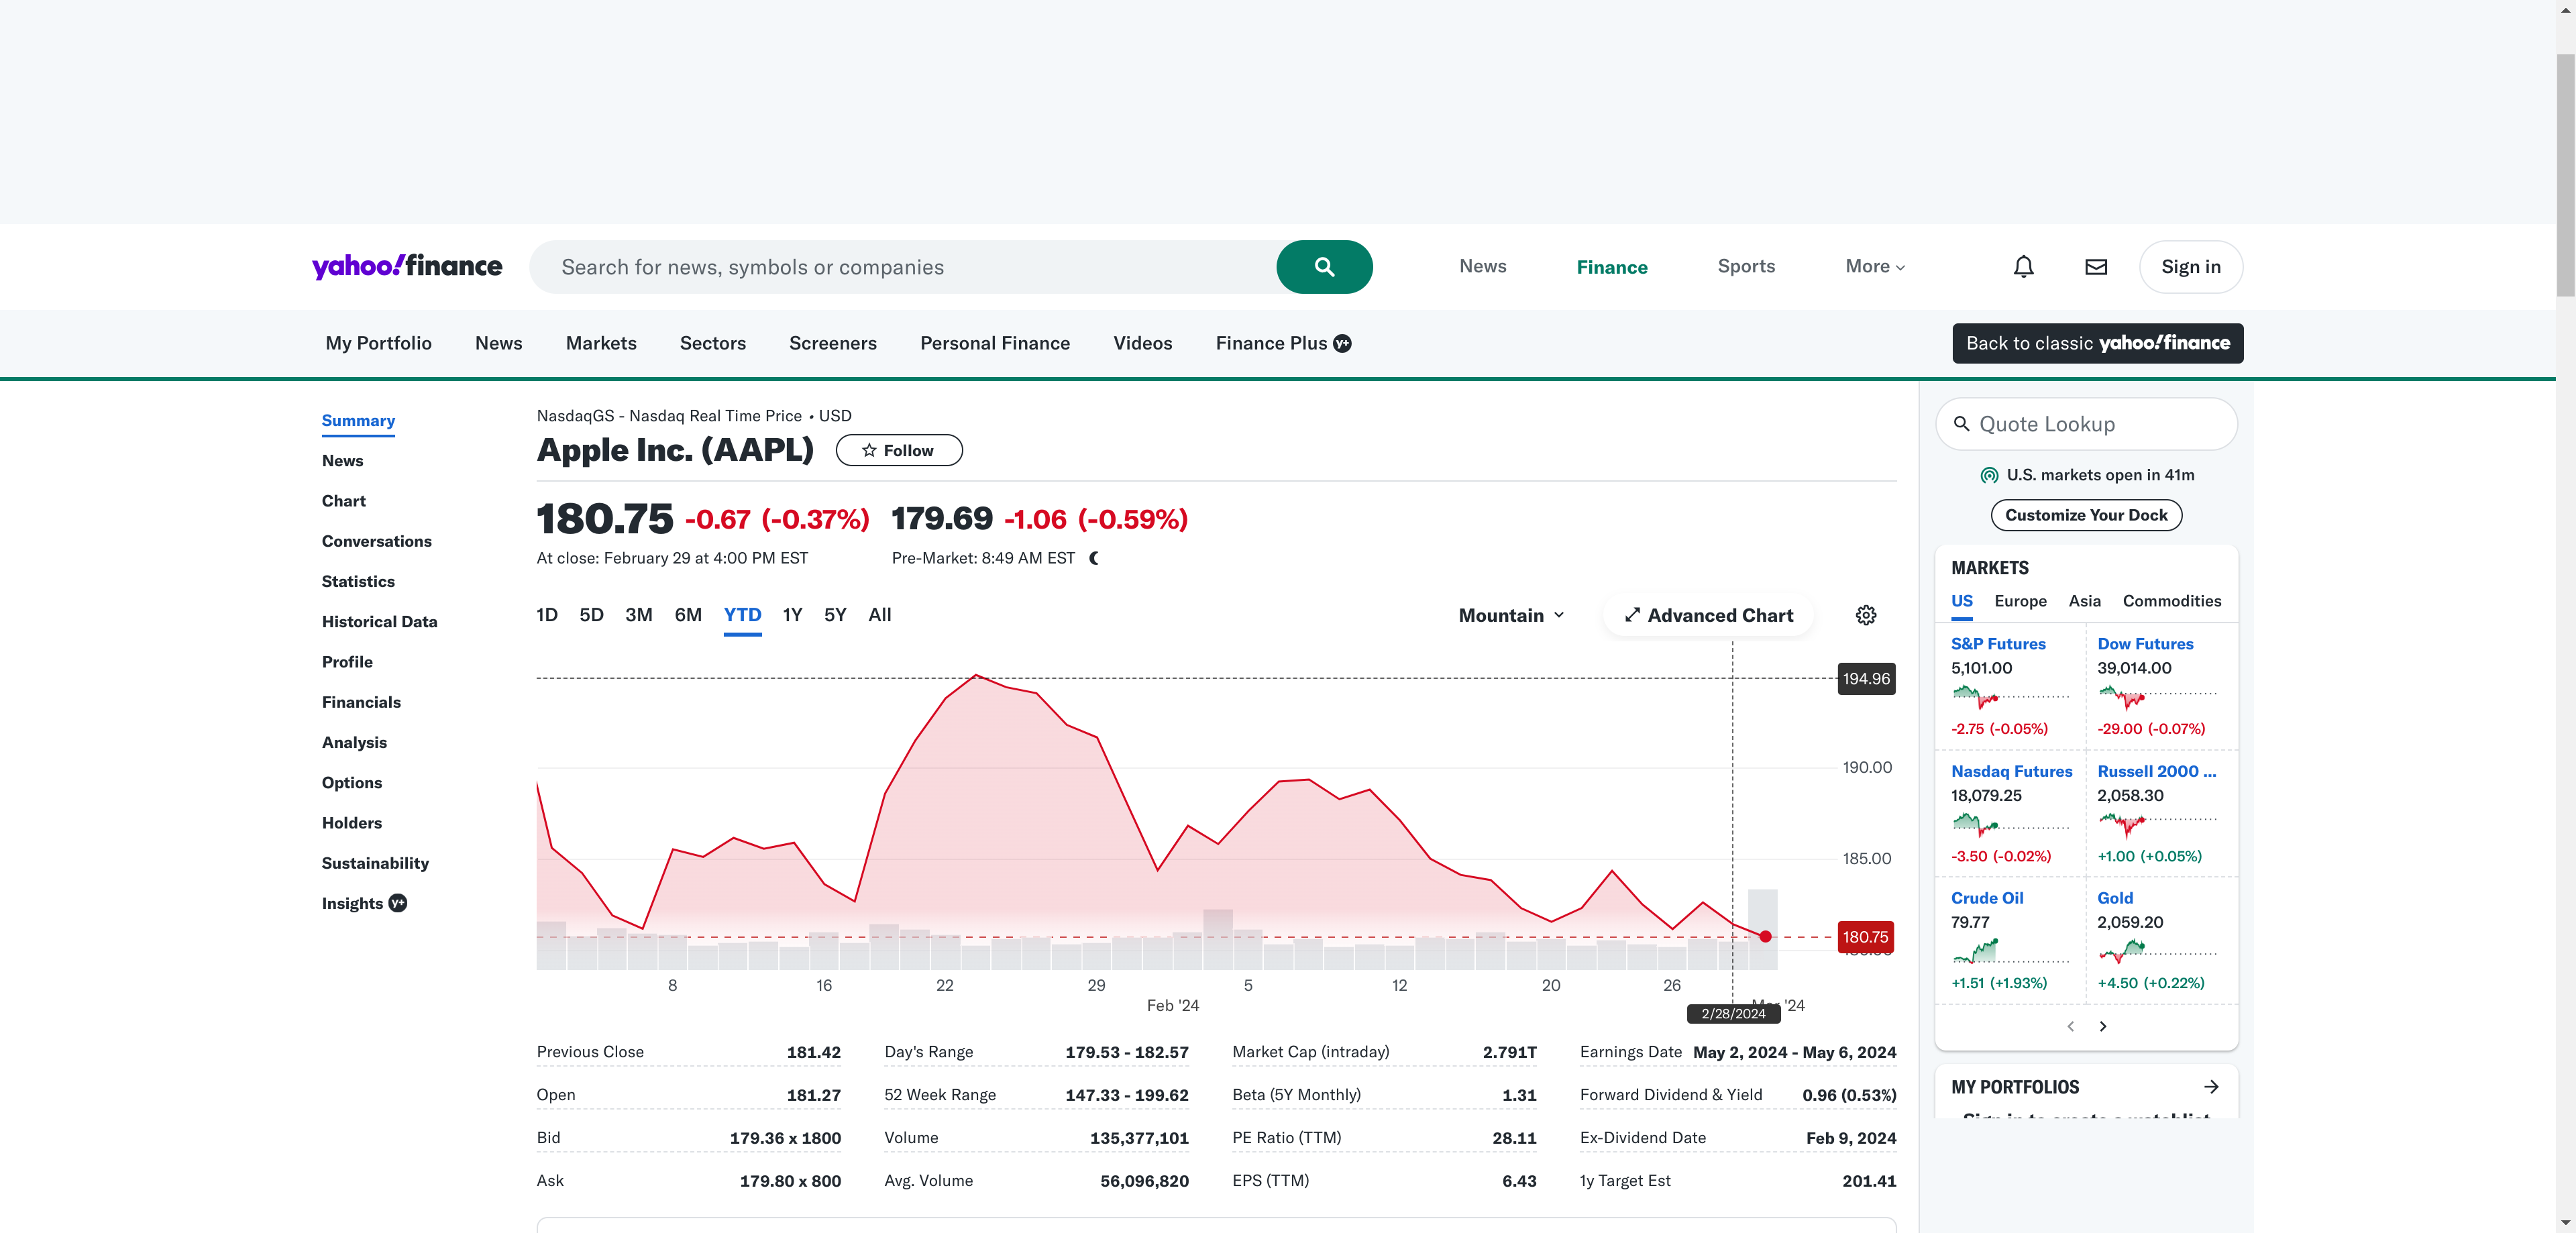

In [61]:
from IPython.display import display, Image
display(Image(data=adv_chart_png))

In [62]:
# You could also save the screenshot as a file
with open ('adv_chart.png', 'wb') as fh:
    fh.write(adv_chart_png)

## Find Elements using XPath
You can also use the XPath notation to locate elements. One way to obtain the XPath selector is to use the Inspect feature of your browser, point to Copy, and then choose XPATH.

In [63]:
browser.get('https://mybama.ua.edu')

In [64]:
print(browser.find_element(By.XPATH,'//*[@id="username"]').get_attribute("id"))

username


## Find Elements using CSS
You can also use CSS to locate elements. One way to obtain the CSS selector is to use the Inspect feature of your browser, point to Copy, and then choose "Copy selector".

In [65]:
print(browser.find_element(By.CSS_SELECTOR,'#username').get_attribute("id"))

username


## Find element by Class Name
You can also find elements by class name. If a class name has spaces in it, those are multiple class names. For example, the Submit button has the following class: ```btn btn-block btn-submit```. You may select that button using any of the three different class names. You may NOT use the entire contents ```btn btn-block btn-submit```. To click the button, add the .click() method after the element.

```Python
browser.find_element(By.CLASS_NAME, 'btn-submit').get_attribute("name").click()
```

In [66]:
# Choose only one of the class names to locate the HTML element
print(browser.find_element(By.CLASS_NAME,'mdc-text-field__input').get_attribute("style"))

font-size: 1.2rem; border: 1px solid rgb(189, 189, 189); padding: 1.2rem 0.5rem; border-radius: 4px;


## Find Elements by Link and partial Link

In [67]:
links = browser.find_elements(By.PARTIAL_LINK_TEXT,'Student')
for link in links:
    print(link.text)

Student Parent or Guest Login
Student Financial Account Authorized User


## Exceptions when locating Elements
If you attempt to locate an element that does not exist, Python will raise a ```NoSuchElementException``` error. To trap that error, first import it from selenium.common.exceptions and then use a try...except block. You could also trap it generically, of course (e.g., just a try...except block without using NoSuchElementException).

In [68]:
browser.get('https://mybama.ua.edu')

In [69]:
# ERROR - Element does not exist.
print(browser.find_element(By.ID, 'duo_password').get_attribute("name"))

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"[id="duo_password"]"}
  (Session info: chrome=122.0.6261.94); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
#0 0x556062928e93 <unknown>
#1 0x556062620ce6 <unknown>
#2 0x55606266be48 <unknown>
#3 0x55606266bf01 <unknown>
#4 0x5560626af3f4 <unknown>
#5 0x55606268dedd <unknown>
#6 0x5560626ac899 <unknown>
#7 0x55606268dc53 <unknown>
#8 0x55606265edb3 <unknown>
#9 0x55606265f77e <unknown>
#10 0x5560628ee7cb <unknown>
#11 0x5560628f27e5 <unknown>
#12 0x5560628dc0e1 <unknown>
#13 0x5560628f3372 <unknown>
#14 0x5560628c01bf <unknown>
#15 0x556062917488 <unknown>
#16 0x556062917683 <unknown>
#17 0x556062928044 <unknown>
#18 0x7f7d48017ac3 <unknown>


In [70]:
from selenium.common.exceptions import NoSuchElementException

try:
    print(browser.find_element(By.ID,'duo_password').get_attribute("name"))
except NoSuchElementException as no_element_err:
    print(no_element_err)

print("continue scraping...")

Message: no such element: Unable to locate element: {"method":"css selector","selector":"[id="duo_password"]"}
  (Session info: chrome=122.0.6261.94); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
#0 0x556062928e93 <unknown>
#1 0x556062620ce6 <unknown>
#2 0x55606266be48 <unknown>
#3 0x55606266bf01 <unknown>
#4 0x5560626af3f4 <unknown>
#5 0x55606268dedd <unknown>
#6 0x5560626ac899 <unknown>
#7 0x55606268dc53 <unknown>
#8 0x55606265edb3 <unknown>
#9 0x55606265f77e <unknown>
#10 0x5560628ee7cb <unknown>
#11 0x5560628f27e5 <unknown>
#12 0x5560628dc0e1 <unknown>
#13 0x5560628f3372 <unknown>
#14 0x5560628c01bf <unknown>
#15 0x556062917488 <unknown>
#16 0x556062917683 <unknown>
#17 0x556062928044 <unknown>
#18 0x7f7d48017ac3 <unknown>

continue scraping...


In [71]:
import json
with open('info.json', 'r') as filehandle:
    credentials = json.load(filehandle)

## Check if an element is visible
For elements that are present on the page, you can check whether or not they are displayed to the user. Note that if you attempt to check if a non-existent element is displayed, you'll still raise a NoSuchElementException error.

# Paginating Example

In [72]:
# Open job site
browser.get('https://careers.ua.edu/jobs/search')

In [73]:
row_tags = list(browser.find_elements(By.TAG_NAME,'tr'))

In [74]:
row_tags[0].text

'Title Requisition Identifier Category Department Employment Type Location Closing date'

In [75]:
tables = browser.find_elements(By.CLASS_NAME, 'table')
print(len(tables))

1


In [76]:
page_html = bs4.BeautifulSoup(browser.page_source)

In [77]:
page_html

<html lang="en-US"><head><style class="vjs-styles-defaults">
      .video-js {
        width: 300px;
        height: 150px;
      }

      .vjs-fluid:not(.vjs-audio-only-mode) {
        padding-top: 56.25%
      }
    </style><style type="text/css">.turbo-progress-bar {
  position: fixed;
  display: block;
  top: 0;
  left: 0;
  height: 3px;
  background: #0076ff;
  z-index: 2147483647;
  transition:
    width 300ms ease-out,
    opacity 150ms 150ms ease-in;
  transform: translate3d(0, 0, 0);
}
</style>
<title>Search Page</title>
<script async="" id="www-widgetapi-script" src="https://www.youtube.com/s/player/31eb286a/www-widgetapi.vflset/www-widgetapi.js" type="text/javascript"></script><script src="https://www.youtube.com/iframe_api"></script><script data-turbo-track="reload" nonce="L78oPvBgBequCL6JXHc09A==" type="importmap">{
  "imports": {
    "bootstrap": "/assets/bootstrap5.bundle.min-1347354811d71ef0dc989880e3a5cafa93ffd530.js",
    "bootstrap4": "/assets/bootstrap4.bundle.min-d

In [78]:
post_body = page_html.find(attrs = {'class':'even'})

In [79]:
post_body

In [80]:
for row_tag in row_tags:
    col_tags = row_tag.find_elements(By.TAG_NAME,'td')
    for col_tag in col_tags:
        print(col_tag.text, sep=" ")
    print('-'*80)

--------------------------------------------------------------------------------
LPN - Part Time (Benefits Eligible) - 521643
521643
Health Care / Social Services
Assoc VP Finance and Operations Business Activities
Regular Part-time (Benefits eligible)
Tuscaloosa
Mar 7 2024 at 22:55 CST
--------------------------------------------------------------------------------
Park Attendant - Contingent / On-Call (No benefits) - 522041
522041
Retail/Sales/Customer Service
Arts and Sciences
Contingent / On-Call (No benefits)
Tuscaloosa
Mar 5 2024 at 22:55 CST
--------------------------------------------------------------------------------
Engineering Researcher II
522077
Engineering/Computer Science
Engineering
Regular Full-time (Benefits eligible)
Tuscaloosa
Mar 7 2024 at 22:55 CST
--------------------------------------------------------------------------------
Associate Director Research Ethics and Compliance - 522076
522076
Director/Executive
Research/Scientific
Assoc VP Research
Regular Full-

In [81]:
next_href = browser.find_element(By.PARTIAL_LINK_TEXT,'›')

In [82]:
# Get the list tag to check if we've reached the end
#     When there are no more pages 'disabled' will appear as a class item
next_href = browser.find_element(By.CLASS_NAME,'next_page')

In [83]:
# Get the anchor tag so that we can click Next
# next_button = browser.find_element(By.CLASS_NAME, 'next')
cn_class = next_href.get_attribute('class')
cn_class

'next next_page  page-item'

In [84]:
# DEBUG: show the classes
print(f'cn_class =  {cn_class}')

# If 'disabled' is a class item, there are no more pages
if 'disabled' not in cn_class:
    next_href.click()
else:
    print('done')
    

cn_class =  next next_page  page-item


In [85]:
rows = browser.find_elements(By.TAG_NAME, 'tr')

In [86]:
for row in rows:
    cols = row.find_elements(By.TAG_NAME, 'td')
    for col in cols:
        print(col.text, end = "|")
    print()
    print('-'*40)


----------------------------------------
Medical Insurance Clerk I - 522053|522053|Health Care / Social Services
Office/Clerical Support|CCHS|Regular Full-time (Benefits eligible)|Tuscaloosa|Mar 4 2024 at 22:55 CST|
----------------------------------------
Medical Assistant I - UMC OBGYN - 522051|522052|Health Care / Social Services|CCHS|Regular Full-time (Benefits eligible)|Tuscaloosa|Mar 4 2024 at 22:55 CST|
----------------------------------------
Medical Assistant I - UMC Resident Clinic - 522051|522051|Health Care / Social Services|CCHS|Regular Full-time (Benefits eligible)|Tuscaloosa|Mar 4 2024 at 22:55 CST|
----------------------------------------
LPN - UMC OBGYN - 522050|522050|Health Care / Social Services|CCHS|Regular Full-time (Benefits eligible)|Tuscaloosa|Mar 4 2024 at 22:55 CST|
----------------------------------------
LPN - UMC Resident Clinic - 522049|522049|Health Care / Social Services|CCHS|Regular Full-time (Benefits eligible)|Tuscaloosa|Mar 4 2024 at 22:55 CST|
---

# Filling Out and Submitting Forms
To send text to input elements on a form, first find the element then invoke the send_keys method passing the text you want to enter into the form field.

In [87]:
browser.get('https://mybama.ua.edu')

In [88]:
browser.find_element(By.ID,'username').clear()

In [89]:
browser.find_element(By.ID,'username').send_keys('gjbott')
browser.find_element(By.ID,'password').send_keys(credentials['Password'])

In [90]:
browser.find_element(By.CLASS_NAME, 'mdc-button').click()

# Sending Special Keys
Selenium also supports sending special keys such as directional keys (UP, DOWN, RIGHT, LEFT), as well as the ESCAPE, DELETE, TAB, BACK_SPACE, HOME, END, PAGE_DOWN, and PAGE_UP keys.

In [92]:
# ROBOT Detected!!
browser.get('https://wsj.com')

In [93]:
browser.get('https://espn.com')

In [94]:
# First, get an element on the page
from selenium.webdriver.common.keys import Keys
htmlElem = browser.find_element(By.TAG_NAME,'html')

In [95]:
htmlElem.send_keys(Keys.PAGE_DOWN)

# Delaying actions
Automated actions happen very quickly. Sometimes too quickly for a browser to handle. There are several methods to force your browser to wait. One simple method is to sleep for X number of seconds.

In [96]:
import time
htmlElem.send_keys(Keys.HOME)
time.sleep(2) # Wait 2 seconds
htmlElem.send_keys(Keys.END)

## Clicking Browser Buttons
You may also want to use the standard Back, Forward, Refresh and Quit buttons on a browser.

In [ ]:
# Go back
browser.back()

In [ ]:
browser.forward()

In [ ]:
browser.current_url

## Ending your session
Selenium provides a ```close``` and ```quit``` method. The former closes a window, but leaves the session in memory, quit closes all windows and deletes the session.

In [ ]:
# Quit and end session
browser.quit()